# Основная часть



Общая функция:

In [ ]:
from re import compile as _recompile_
import matplotlib.pyplot as plt

%matplotlib inline

rule = _recompile_(r'(N+)')

In [ ]:
scaffolds = {'Длина макс скаффолда': [], 'Кол-во скаффолдов': [], 'n50': [], 'Длина гэпов': [], 'Общая длина': [], 'Кол-во гэпов': []}
contigs = {'Длина макс контига': [], 'Кол-во контигов': [], 'n50': [], 'Общая длина': []} 
gapclosed = {'Общая длина': [], 'Кол-во гэпов': []}
sequences = ['main', 'seq1', 'seq2']

In [ ]:
def counter(file, analysname):
  datadict = {'lenght': 0, 'count': 0}
  allctgs = []

  f = open(file, 'r')

  for i in f.readlines():
      if i[0] == '>':
        datadict['count'] += 1
        indexlen = i.find('len') + 3
        indexcov = i.find('cov') - 1
        ind = str(i[indexlen:indexcov])
        datadict['lenght'] += int(ind)
        allctgs.append(int(ind))

  f.close()
  allctgs.sort(reverse = True)
  score = 0
  i = 0

  for i in allctgs:
    score += i
    if score >= datadict['lenght'] / 2:
      print(f'Анализ {analysname}\n\
      Общее количество: {datadict["count"]},\n\
      Общая длина: {datadict["lenght"]},\n\
      Длина самого длинного: {allctgs[0]},\n\
      N50: {i}\n')
      break

  return allctgs[0], datadict["count"], datadict["lenght"], i
        

In [ ]:
def findmax(file, outfile, maxlen):
  f = open(file, 'r')
  flag = False
  lenght = 0
  maxseq = ''

  for i in f.readlines():
    if i[0] == '>':
      indexlen = i.find('len') + 3
      indexcov = i.find('cov') - 1
      ind = str(i[indexlen:indexcov])
      lenght = int(ind)

      if flag: break

    if lenght == maxlen:
      maxseq += i
      flag = True

  f.close()

  f = open(outfile, 'w')
  f.write(maxseq)
  f.close()

  return maxseq

In [ ]:
def gapfindmax(file, outname):
  f = open(file, 'r')
  maxseq = ''
  seq = ''
  maxlen = 0
  lenseq = 0

  for i in f.readlines():
    if i[0] == '>':
      lenseq = len(seq)

      if lenseq > maxlen:
        maxlen = lenseq
        maxseq = seq
      
      seq = ''
      continue

    seq += i

  f.close()

  f = open(outname, 'w')
  f.write(maxseq)
  f.close()

  return maxseq

## Контиги

In [ ]:
a, b, c, d = counter('Poil_contig.fa', 'контигов')
contigs['Длина макс контига']. append(a) 
contigs['Кол-во контигов'].append(b)
contigs['Общая длина'].append(c)
contigs['n50'].append(d) 

Анализ контигов
      Общее количество: 614,
      Общая длина: 3925461,
      Длина самого длинного: 179307,
      N50: 47508



## Скаффолды

In [ ]:
max, b, c, d = counter('Poil_scaffold.fa', 'скаффолдов')
scaffolds['Длина макс скаффолда']. append(max) 
scaffolds['Кол-во скаффолдов'].append(b)
scaffolds['Общая длина'].append(c)
scaffolds['n50'].append(d) 

Анализ скаффолдов
      Общее количество: 72,
      Общая длина: 3876209,
      Длина самого длинного: 3835526,
      N50: 3835526



In [ ]:
scaff = findmax('Poil_scaffold.fa', 'longest.fa', max)

In [ ]:
scaffolds['Длина гэпов'].append(scaff.count('N'))
print('Общая длина гэпов: ', scaff.count('N'))

scaff2 = rule.sub('N', scaff)
print('Число гэпов: ', scaff2.count('N'))
scaffolds['Кол-во гэпов'].append(scaff2.count('N'))

Общая длина гэпов:  6623
Число гэпов:  147


## Для уменьшенного количества гэпов

In [ ]:
gapscaff = gapfindmax('Poil_gapClosed.fa', 'longesttrimmed.fa')

In [ ]:
gapclosed['Общая длина'].append(gapscaff.count('N'))
print('Общая длина гэпов для обрезанных чтений: ', gapscaff.count('N'))

gapscaff2 = rule.sub('N', gapscaff)
print('Число гэпов для обрезанных чтений: ', gapscaff2.count('N'))
gapclosed['Кол-во гэпов'].append(gapscaff2.count('N'))

Общая длина гэпов для обрезанных чтений:  1512
Число гэпов для обрезанных чтений:  25


# Дополнительная часть

## Геном 1

### Контиги

In [ ]:
a, b, c, d = counter('Poil_contig_seq1.fa', 'контигов')
contigs['Длина макс контига']. append(a) 
contigs['Кол-во контигов'].append(b)
contigs['Общая длина'].append(c)
contigs['n50'].append(d) 

Анализ контигов
      Общее количество: 705,
      Общая длина: 3924023,
      Длина самого длинного: 253235,
      N50: 73640



### Скаффолды

In [ ]:
max, b, c, d = counter('Poil_scaffold_seq1.fa', 'скаффолдов')
scaffolds['Длина макс скаффолда']. append(max) 
scaffolds['Кол-во скаффолдов'].append(b)
scaffolds['Общая длина'].append(c)
scaffolds['n50'].append(d) 

Анализ скаффолдов
      Общее количество: 82,
      Общая длина: 3868737,
      Длина самого длинного: 3824788,
      N50: 3824788



In [ ]:
scaff = findmax('Poil_scaffold_seq1.fa', 'longest_seq1.fa', max)

In [ ]:
scaffolds['Длина гэпов'].append(scaff.count('N'))
print('Общая длина гэпов: ', scaff.count('N'))

scaff2 = rule.sub('N', scaff)
print('Число гэпов: ', scaff2.count('N'))
scaffolds['Кол-во гэпов'].append(scaff2.count('N'))

Общая длина гэпов:  7444
Число гэпов:  169


### Уменьшенные гэпы

In [ ]:
gapscaff = gapfindmax('Poil_gapClosed_seq1.fa', 'longesttrimmed_seq1.fa')

In [ ]:
gapclosed['Общая длина'].append(gapscaff.count('N'))
print('Общая длина гэпов для обрезанных чтений: ', gapscaff.count('N'))

gapscaff2 = rule.sub('N', gapscaff)
print('Число гэпов для обрезанных чтений: ', gapscaff2.count('N'))
gapclosed['Кол-во гэпов'].append(gapscaff2.count('N'))

Общая длина гэпов для обрезанных чтений:  3323
Число гэпов для обрезанных чтений:  59


## Геном 2

### Контиги

In [ ]:
a, b, c, d = counter('Poil_contig_seq2.fa', 'контигов')
contigs['Длина макс контига']. append(a) 
contigs['Кол-во контигов'].append(b)
contigs['Общая длина'].append(c)
contigs['n50'].append(d) 

Анализ контигов
      Общее количество: 967,
      Общая длина: 3916367,
      Длина самого длинного: 257039,
      N50: 72737



### Скаффолды

In [ ]:
max, b, c, d = counter('Poil_scaffold_seq2.fa', 'скаффолдов')
scaffolds['Длина макс скаффолда']. append(max) 
scaffolds['Кол-во скаффолдов'].append(b)
scaffolds['Общая длина'].append(c)
scaffolds['n50'].append(d) 

Анализ скаффолдов
      Общее количество: 118,
      Общая длина: 3859418,
      Длина самого длинного: 2085724,
      N50: 2085724



In [ ]:
scaff = findmax('Poil_scaffold_seq2.fa', 'longest_seq2.fa', max)

In [ ]:
scaffolds['Длина гэпов'].append(scaff.count('N'))
print('Общая длина гэпов: ', scaff.count('N'))

scaff2 = rule.sub('N', scaff)
print('Число гэпов: ', scaff2.count('N'))
scaffolds['Кол-во гэпов'].append(scaff2.count('N'))

Общая длина гэпов:  7055
Число гэпов:  158


### Уменьшенные гэпы

In [ ]:
gapscaff = gapfindmax('Poil_gapClosed_seq2.fa', 'longesttrimmed_seq2.fa')

In [ ]:
gapclosed['Общая длина'].append(gapscaff.count('N'))
print('Общая длина гэпов для обрезанных чтений: ', gapscaff.count('N'))

gapscaff2 = rule.sub('N', gapscaff)
print('Число гэпов для обрезанных чтений: ', gapscaff2.count('N'))
gapclosed['Кол-во гэпов'].append(gapscaff2.count('N'))

Общая длина гэпов для обрезанных чтений:  4006
Число гэпов для обрезанных чтений:  70


# Вывод
## Контиги

Смотрим изменения длины максимального контига, кол-ва контигов, N50

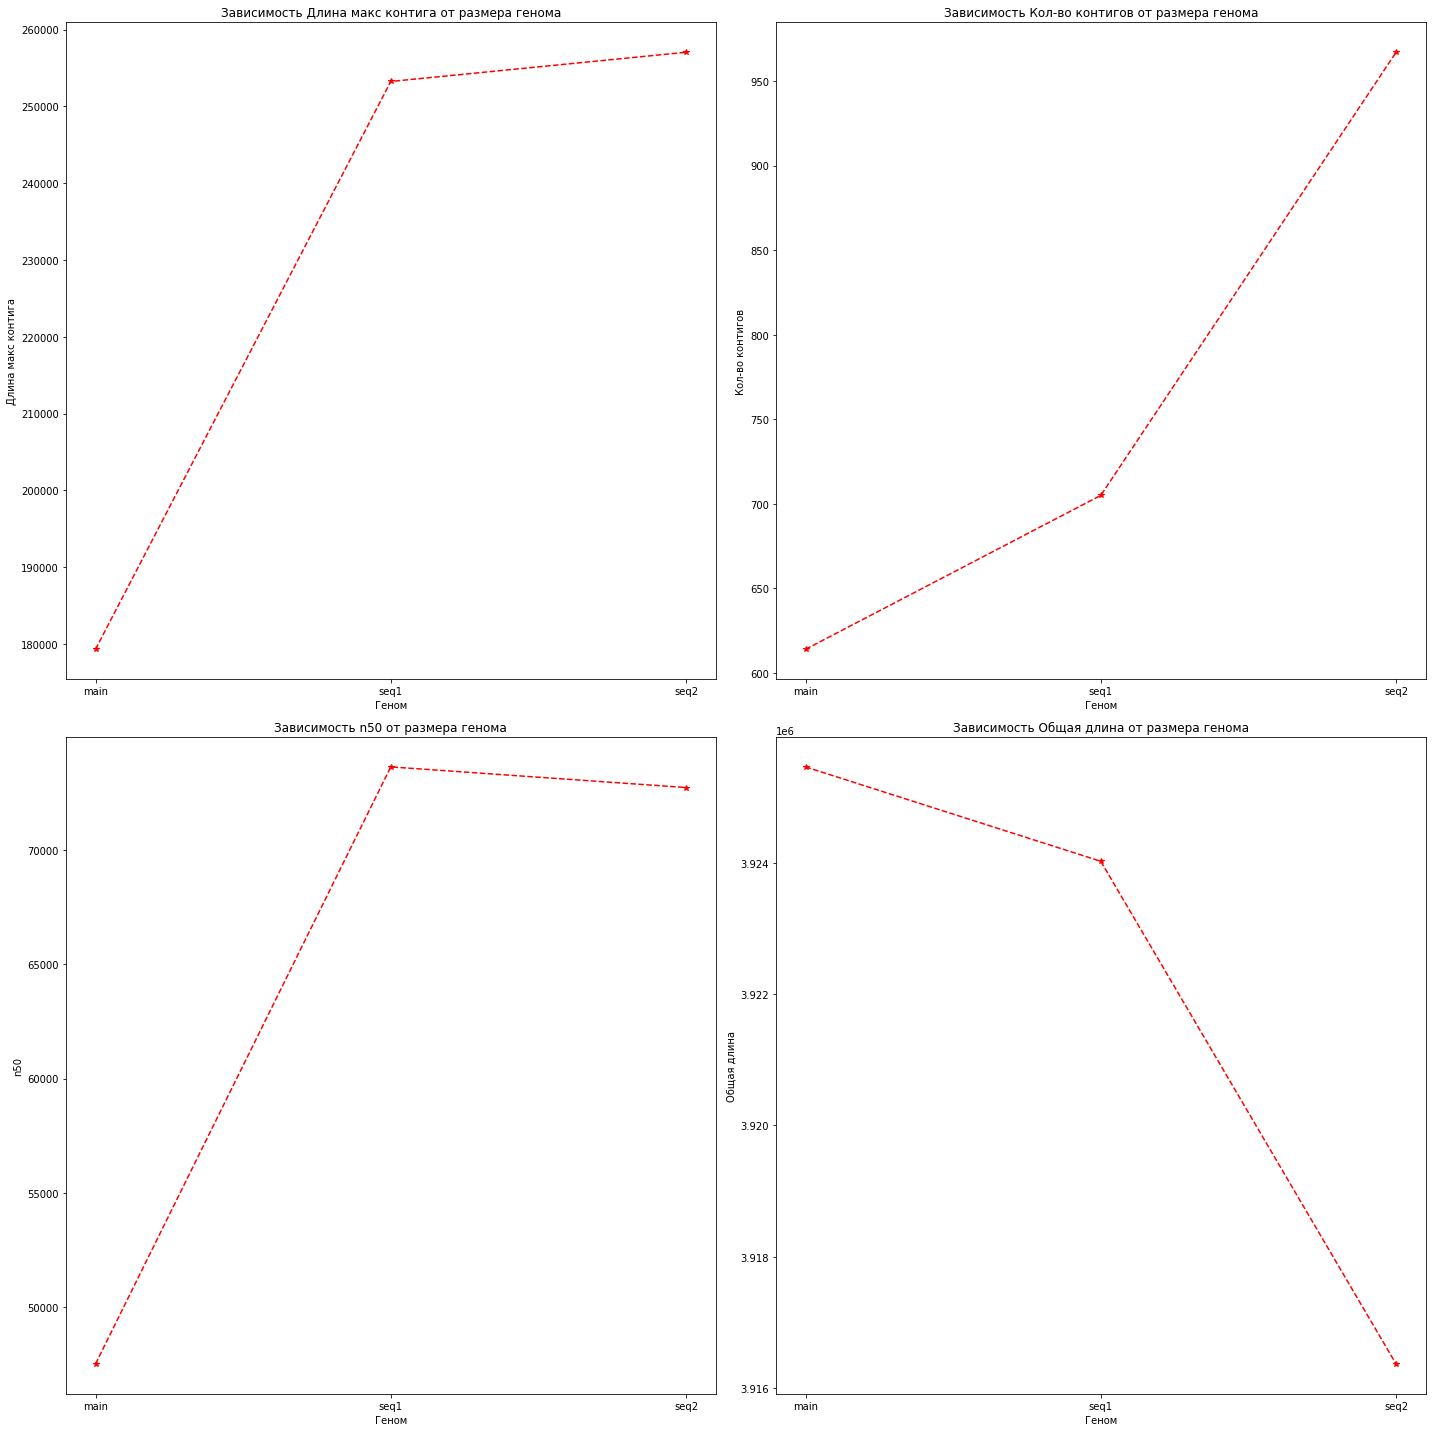

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (20, 20))
a = (ax1, ax2, ax3, ax4)
i = 0

for key, array in contigs.items():
  a[i].plot(sequences, array[1:], 'r*--')
  a[i].set_ylabel(f'{key}')
  a[i].set_xlabel('Геном')
  a[i].set_title(f'Зависимость {key} от размера генома')
  i += 1

fig.tight_layout()

Видные зависимости: рост длины макс контига, кол-ва контигов от размера генома.

Зависимости N50 от размера не наблюдается.

Уменьшение общей длины - обусловленно задачей, показано для наглядности.

## Скаффолды

Смотрим изменения длины максимального скаффолда, кол-ва скаффолдов, N50, длины и кол-ва гэпов

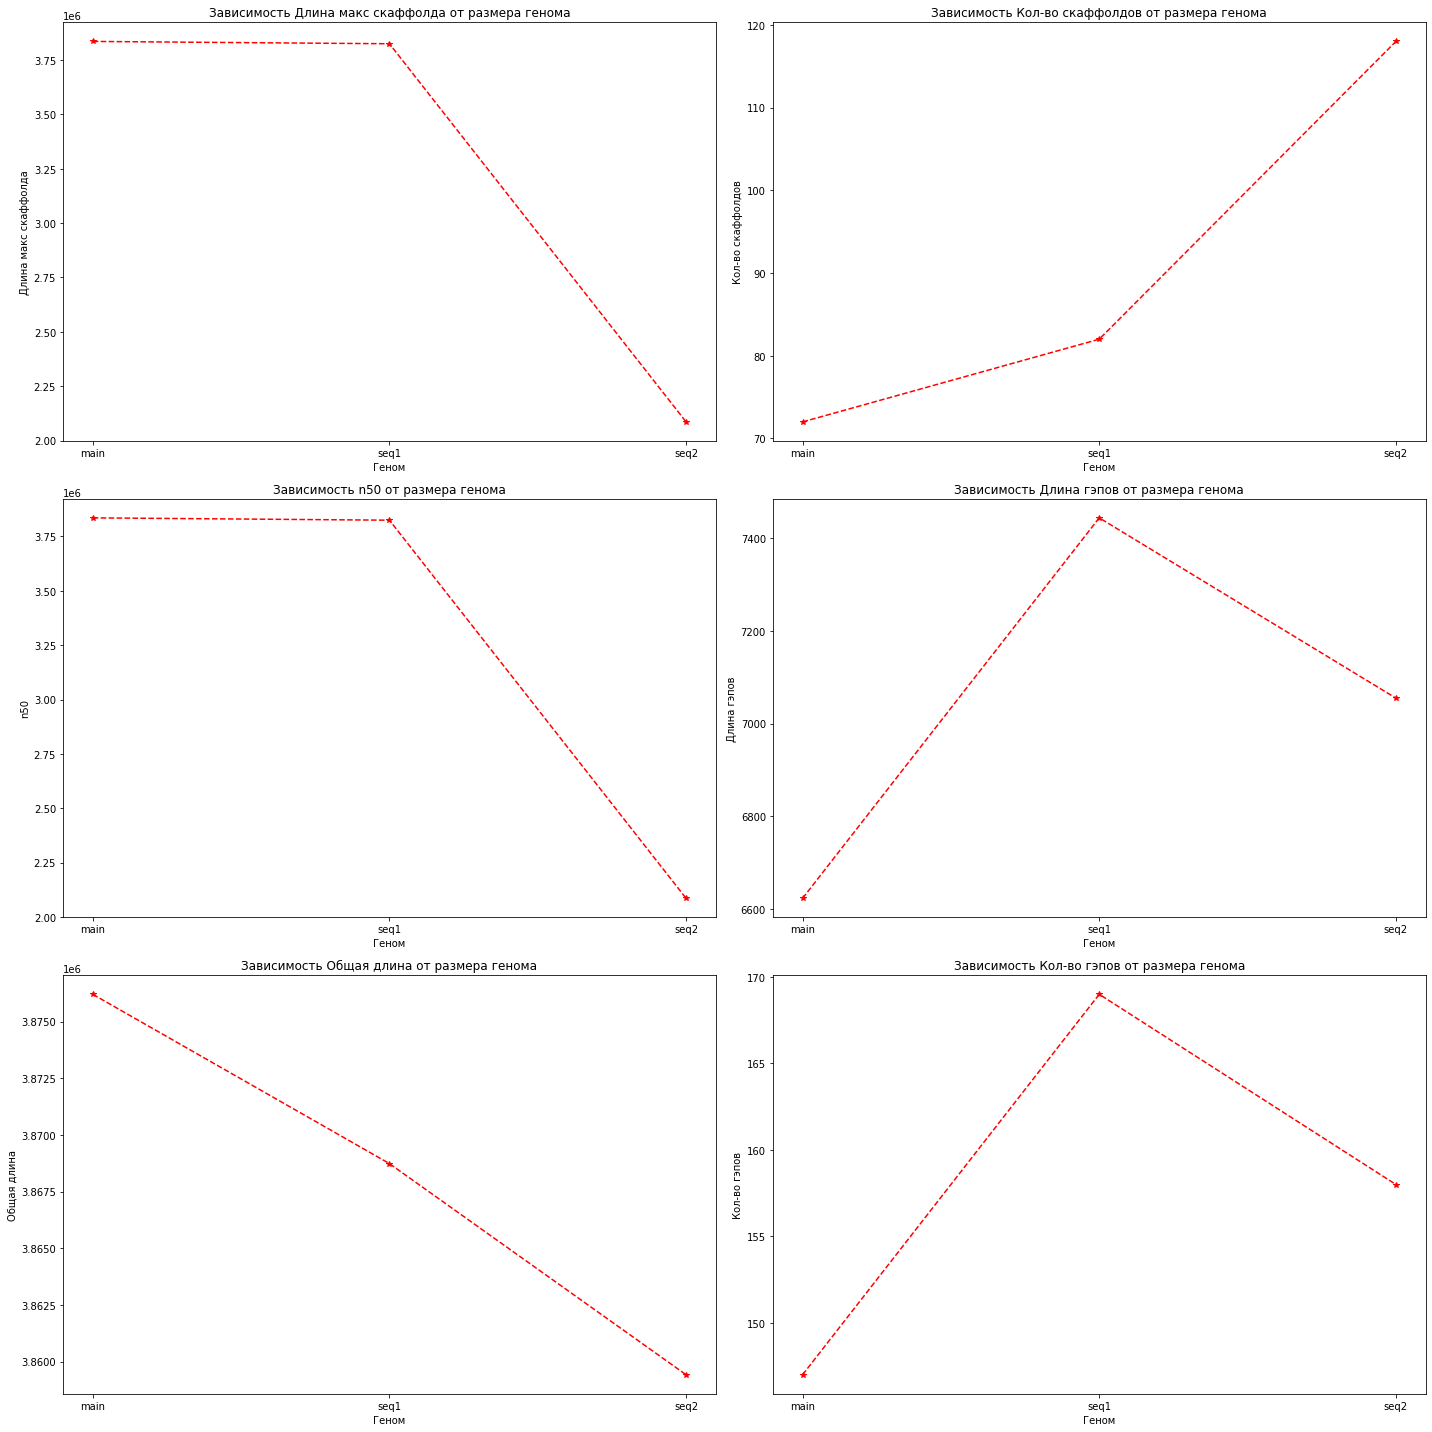

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize = (20, 20))
a = (ax1, ax2, ax3, ax4, ax5, ax6)
i = 0

for key, array in scaffolds.items():
  a[i].plot(sequences, array[1:], 'r*--')
  a[i].set_ylabel(f'{key}')
  a[i].set_xlabel('Геном')
  a[i].set_title(f'Зависимость {key} от размера генома')
  i += 1

fig.tight_layout()

Видные зависимости: убывание длины макс скаффолда, N50, рост кол-ва скаффолдов.

Зависимости длины гэпов и их кол-ва не наблюдается.

Уменьшение общей длины - обусловленно задачей, показано для наглядности.

## Уменьшенные гэпы

Смотрим изменения общей длины гэпов и их кол-во

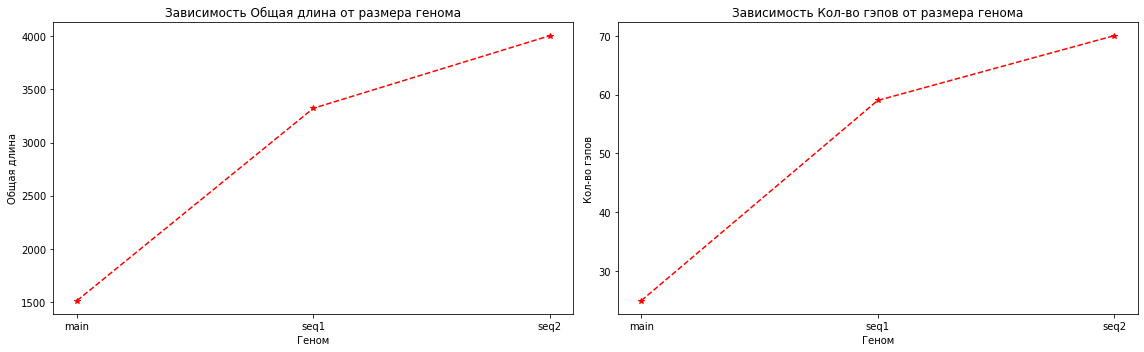

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))
a = (ax1, ax2)
i = 0

for key, array in gapclosed.items():
  a[i].plot(sequences, array[1:], 'r*--')
  a[i].set_ylabel(f'{key}')
  a[i].set_xlabel('Геном')
  a[i].set_title(f'Зависимость {key} от размера генома')
  i += 1

fig.tight_layout()

Видные зависимости: рост кол-ва гэпов и рост общей длины.

**Данных для точного вывода недостаточно, т.к. количество измерений было небольшое.**